## Emotion AI Start

In [1]:
#mount the drive on collab. Load the data onto your drive first tho

#### Imports

In [135]:
import numpy as np
import pandas as pd
import os
import PIL
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_dir='C:/Users/MC/Desktop/Projects/Project1/'


In [52]:
#Reading in the keyppint anntation file
df_keypoints= pd.read_csv(data_dir + 'data.csv')

In [4]:
df_keypoints.head(2)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...


In [5]:
df_keypoints.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [6]:
df_keypoints.shape
#30 feature colunms (x and y co-ordinate) and last column has image pixels

(2140, 31)

In [7]:
df_keypoints.isnull().sum()


left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [8]:
df_keypoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [9]:
#Image column has image pixel values.
df_keypoints['Image']
df_keypoints['Image'].shape

(2140,)

In [10]:
type(df_keypoints['Image'][0])
#The values are in a string

str

In [54]:
#Change the pixel values into string and into a 2-D array.
df_keypoints['Image']= df_keypoints['Image'].apply(lambda x: list(map(int,x.split(' '))))
#Images from this dataset are 96X96
df_keypoints['Image']=df_keypoints['Image'].apply(lambda x: np.reshape(x,(96,96)))
df_keypoints['Image'][0].shape

(96, 96)

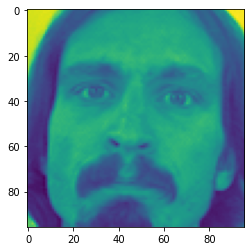

In [12]:
#showing an image
plt.imshow(df_keypoints['Image'][0])

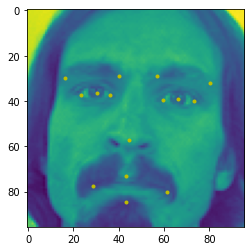

In [13]:
#overlaying keypoints on the face image

plt.imshow(df_keypoints['Image'][0])
for j in range(1,30,2):
    plt.plot(df_keypoints.loc[0][j-1],df_keypoints.loc[0][j],'y.')

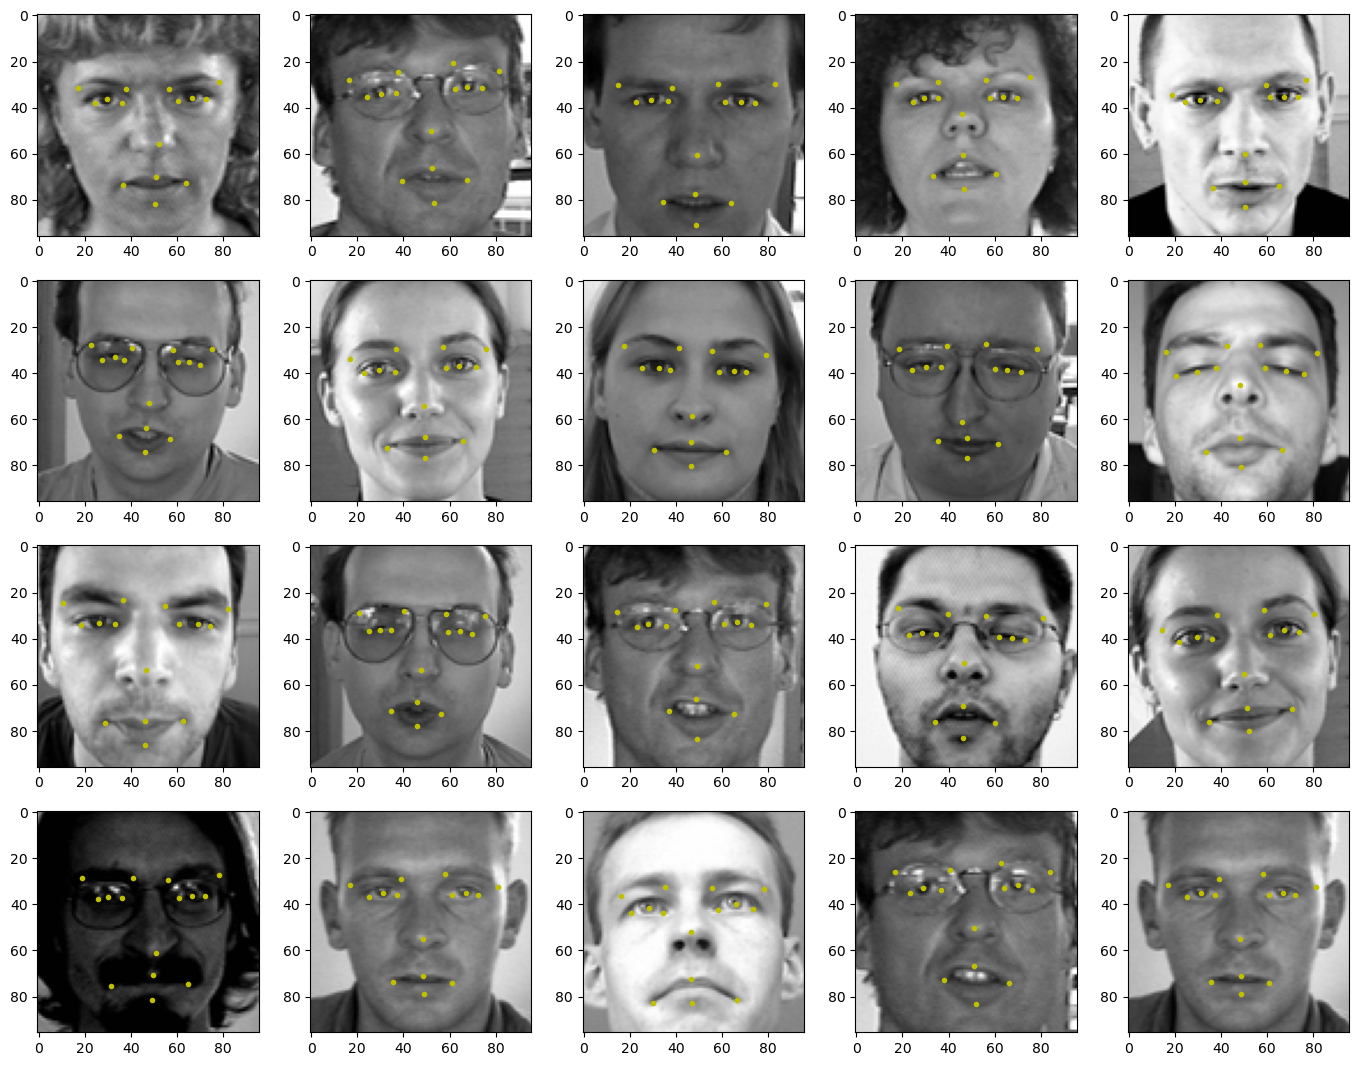

In [14]:
#printing 20 random images from datasets to check

fig =plt.figure(figsize=(17,17),dpi=100) #initializing the figure
for i in range(20):
    k=np.random.randint(1,300) #to get random images, k indexes the rows
    ax= fig.add_subplot(5,5,i+1) #5,5 is importnt cuz the size
    plt.imshow(df_keypoints['Image'][k],cmap='gray')
    
    for j in range(1,30,2):
        plt.plot(df_keypoints.loc[k][j-1],df_keypoints.loc[k][j],'y.')    #j takes x(even) and y(odd) for each feature

### Image Augmentation
##### Since keypoints need to overlay exaclty on each image, I don't use ImageDataGen

## DO Image aug as a generator after train-test split


In [94]:
#copy of orignal dataset
df_keypoints_copy=df_keypoints.copy(deep=True)

In [109]:
#flipping images vertically
df_keypoints_copy['Image']=df_keypoints_copy['Image'].apply(lambda x: np.flip(x,axis=1))

cols= df_keypoints_copy.columns[:-1]

In [110]:
#changing x-coordinates to overlay facepoints
for i in range(len(cols)):
    if i%2 == 0:
        df_keypoints_copy[cols[i]] = df_keypoints_copy[cols[i]].apply(lambda x: 96. - float(x) )
    

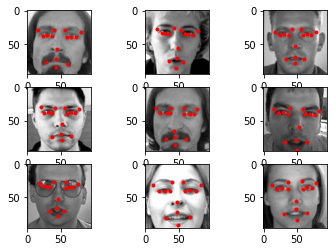

In [97]:
fig= plt.figure()
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints_copy['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints_copy.loc[i][j-1],df_keypoints_copy.loc[i][j],'r.')
    

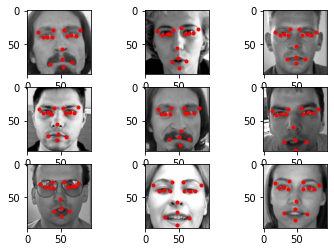

In [98]:
fig= plt.figure()
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints.loc[i][j-1],df_keypoints.loc[i][j],'r.')
    

In [99]:
#adding augmented images to dataset
df_aug_keypoints=pd.concat([df_keypoints,df_keypoints_copy],axis=0)

In [100]:
df_aug_keypoints.shape

(4280, 31)

In [101]:
#flipping images vertically
df_keypoints_copy['Image']=df_keypoints_copy['Image'].apply(lambda x: np.flip(x,axis=0))

In [102]:
#changing y-coordinates to overlay facepoints
for i in range(len(cols)):
    if i%2 != 0:
        df_keypoints_copy[cols[i]] = df_keypoints_copy[cols[i]].apply(lambda x: 96. - float(x) )

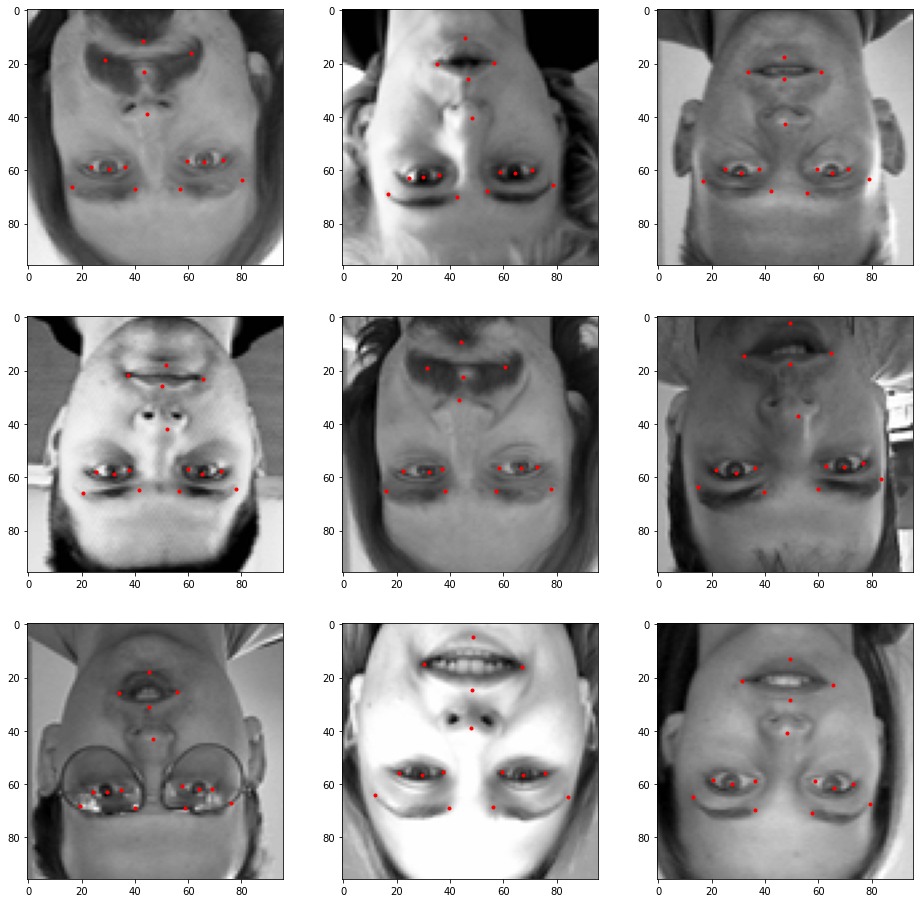

In [103]:
fig= plt.figure(figsize=(16,16))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints_copy['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints_copy.loc[i][j-1],df_keypoints_copy.loc[i][j],'r.')
    

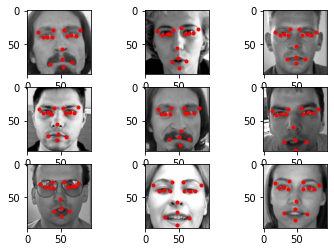

In [104]:
fig= plt.figure()
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    plt.imshow(df_keypoints['Image'][i],cmap='gray')
    
    for j in range(1,31,2):
        plt.plot(df_keypoints.loc[i][j-1],df_keypoints.loc[i][j],'r.')
    

In [111]:
#adding these to final dataset
df_aug_keypoints=pd.concat([df_aug_keypoints,df_keypoints],axis=0)

In [112]:
df_aug_keypoints.shape

(6420, 31)

In [116]:
#changing value of pixels and clipping (brightening)
df_keypoints_copy = df_keypoints.copy(deep=True) 
df_keypoints_copy['Image'] = df_keypoints_copy['Image'].apply(lambda x:np.clip(np.random.uniform(1.5, 2)* x, 0.0, 255.0))
df_aug_keypoints = np.concatenate((df_aug_keypoints, df_keypoints_copy))
df_aug_keypoints.shape

(8560, 31)

## Train Test split and Normalization

In [155]:
images=df_aug_keypoints[:,30]

In [157]:
# Normalize the images
images = images/255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(images), 96, 96, 1))

# Iterate through the img list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(images)):
    X[i,] = np.expand_dims(images[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [161]:
y=df_aug_keypoints[:,:30]
y=np.asarray(y).astype(np.float32)

In [163]:
y.shape

(8560, 30)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=102)

In [167]:
X_train.shape

(7276, 96, 96, 1)

In [168]:
y_train.shape

(7276, 30)